Step 1 :检视源数据集

In [51]:
import numpy as np
import pandas as pd

In [52]:
train_df = pd.read_csv('train.csv',index_col=0)
test_df = pd.read_csv('test.csv',index_col=0)

检视数据源

In [53]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


观测数据，对数据有个直观的了解，哪些需要做进一步的处理

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E8C76BFDA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E8C7748978>]], dtype=object)

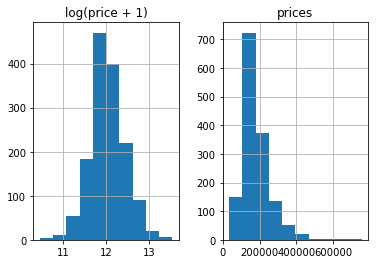

In [54]:
%matplotlib inline
prices = pd.DataFrame({"prices":train_df['SalePrice'],
                      "log(price + 1)":np.log1p(train_df['SalePrice'])})
prices.hist()

价格经过处理后，分布更正太

In [55]:
y_train = np.log1p(train_df.pop('SalePrice'))

In [56]:
all_df = pd.concat((train_df,test_df),axis=0)
all_df.shape

(2919, 79)

In [61]:
all_df['MSSubClass'].dtypes
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)

dtype('O')

In [62]:
#train_df['MSSubClass'].value_counts()
#pd.get_dummies(train_df['MSSubClass'], prefix='MSSubClass')
all_dummy_df  = pd.get_dummies(all_df)
all_dummy_df.head()

KeyError: 'Alley'

In [67]:
all_dummy_df.isnull().sum().sort_values(ascending=False).head()

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
dtype: int64

In [ ]:
mean_cols = all_dummy_df